In [43]:
%matplotlib inline
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,10]

In [44]:
%pwd

'/Users/imjong-in/Nano degree python/Kaggle_Struggle'

In [45]:
train = pd.read_csv('/Users/imjong-in/Nano degree python/Kaggle_Struggle_data/NYC_taxi/train.csv')
test = pd.read_csv('/Users/imjong-in/Nano degree python/Kaggle_Struggle_data/NYC_taxi/test.csv')

In [46]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435


In [47]:
pd.set_option('display.float_format', lambda x: '%.3f' %x)
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435


In [48]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,1.665,-73.973,40.751,-73.973,40.752,959.492
std,0.499,1.314,0.071,0.033,0.071,0.036,5237.432
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1075.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,3526282.000


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [50]:
m = np.mean(train['trip_duration'])
s = np.std(train['trip_duration'])
print(m, s)

959.4922729603659 5237.429929188969


In [51]:
m = np.mean(train['trip_duration'])
s = np.std(train['trip_duration'])
train = train[train['trip_duration'] <= m + 2*s]
train = train[train['trip_duration'] >= m - 2*s] 
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435


In [52]:
train = train[train['pickup_longitude'] <= -73.75]
train = train[train['pickup_longitude'] >= -74.03]
train = train[train['pickup_latitude'] <= 40.85]
train = train[train['pickup_latitude'] >= 40.63]
train = train[train['dropoff_longitude'] <= -73.75]
train = train[train['dropoff_longitude'] >= -74.03]
train = train[train['dropoff_latitude'] <= 40.85]
train = train[train['dropoff_latitude'] >= 40.63]

In [53]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435


In [54]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)
train.loc[:, 'pickup_date'] = train['pickup_datetime'].dt.date
test.loc[:, 'pickup_date'] = test['pickup_datetime'].dt.date
train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)

In [55]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435,2016-03-26


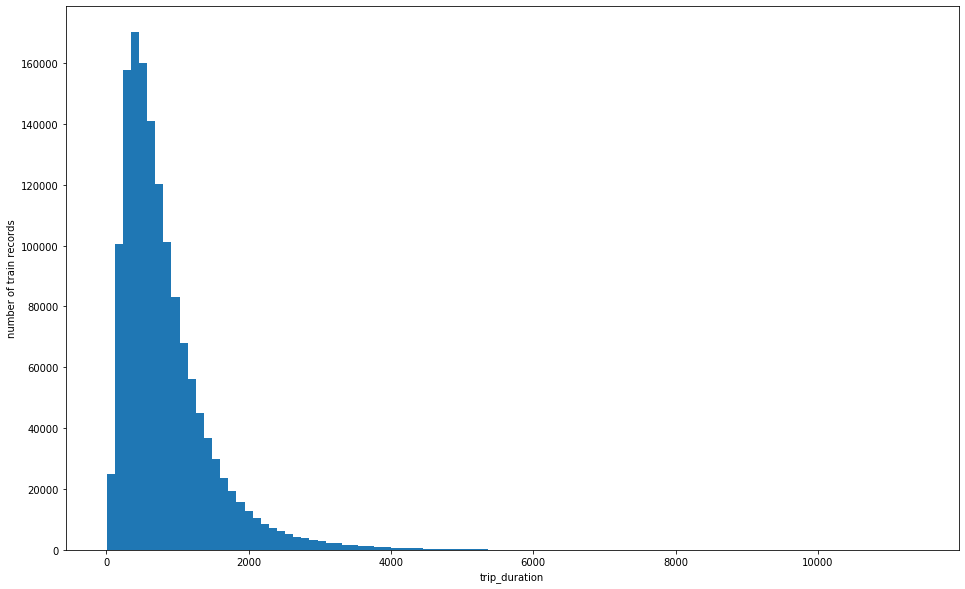

In [56]:
plt.hist(train['trip_duration'].values , bins = 100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

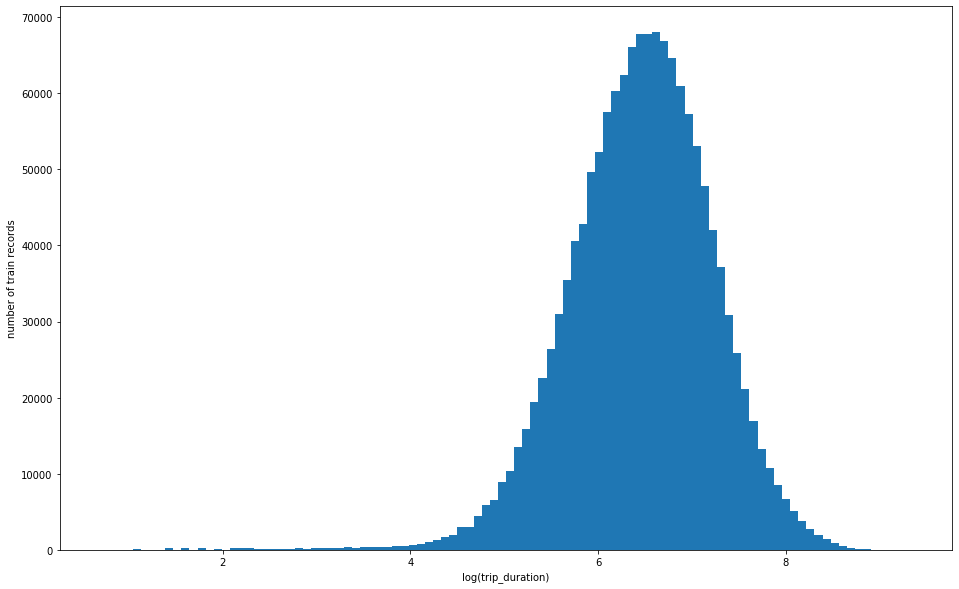

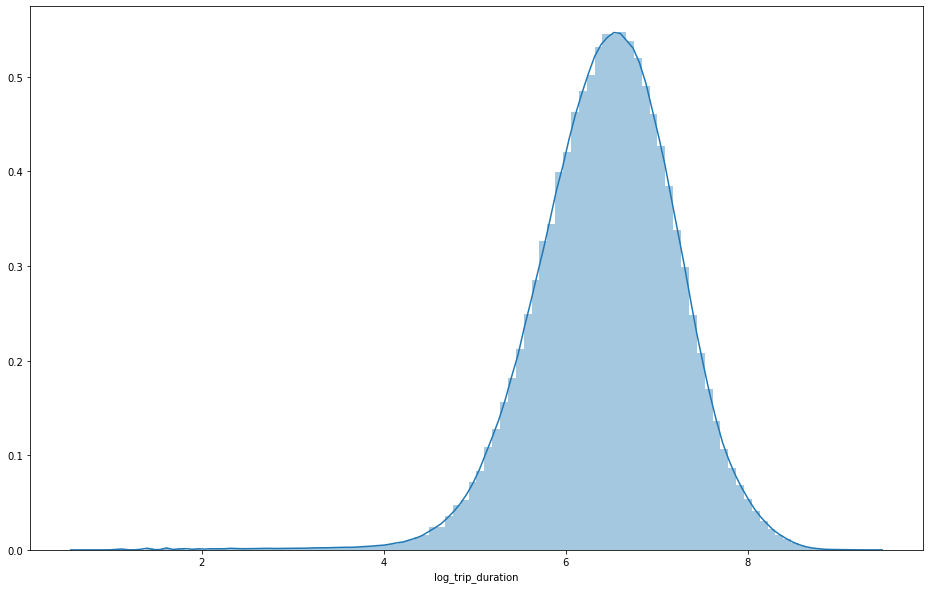

In [57]:
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)
plt.hist(train['log_trip_duration'].values, bins = 100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()
sns.distplot(train['log_trip_duration'], bins = 100)

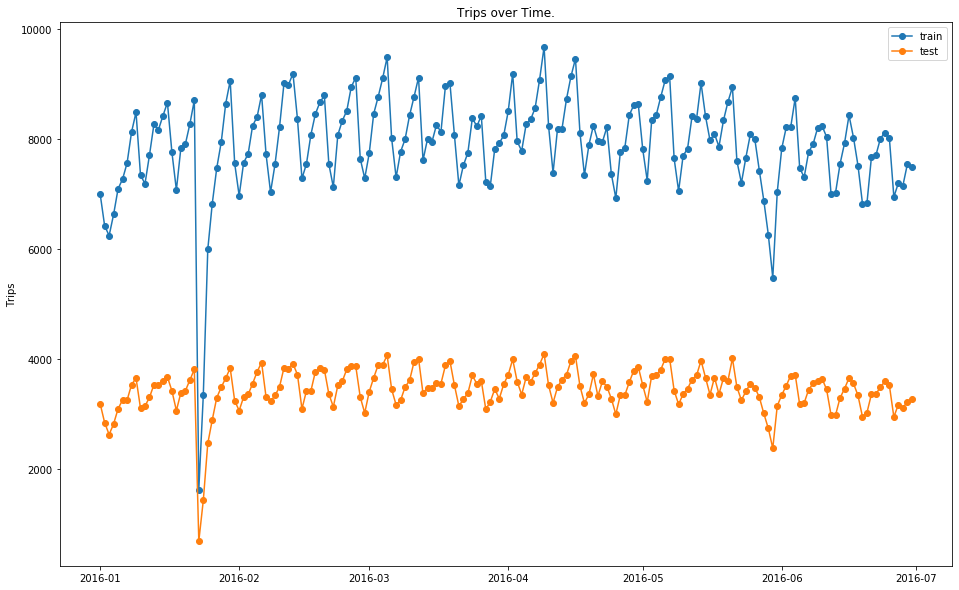

In [58]:
plt.plot(train.groupby('pickup_date').count()[['id']], 'o-', label = 'train')
plt.plot(test.groupby('pickup_date').count()[['id']], 'o-', label = 'test')
plt.title('Trips over Time.')
plt.legend(loc = 0)
plt.ylabel('Trips')
plt.show()

No handles with labels found to put in legend.


Text(0, 0.5, 'Time in Seconds')

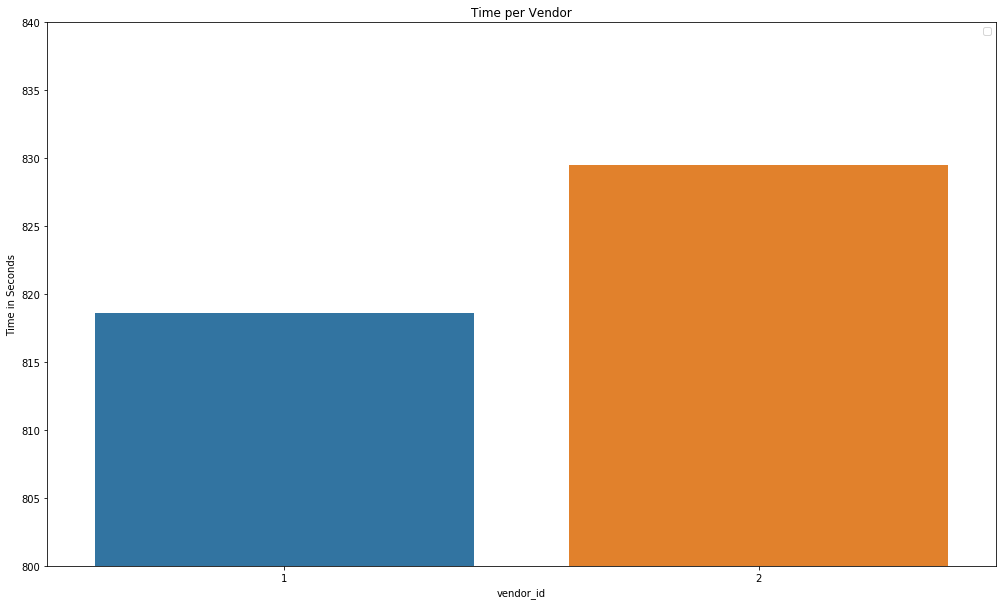

In [59]:
import warnings
warnings.filterwarnings('ignore')
plot_vendor = train.groupby('vendor_id')['trip_duration'].mean()
plt.subplots(1,1,figsize = (17,10))
plt.ylim(ymin = 800)
plt.ylim(ymax = 840)
sns.barplot(plot_vendor.index, plot_vendor.values)
plt.title('Time per Vendor')
plt.legend(loc = 0)
plt.ylabel('Time in Seconds')

No handles with labels found to put in legend.


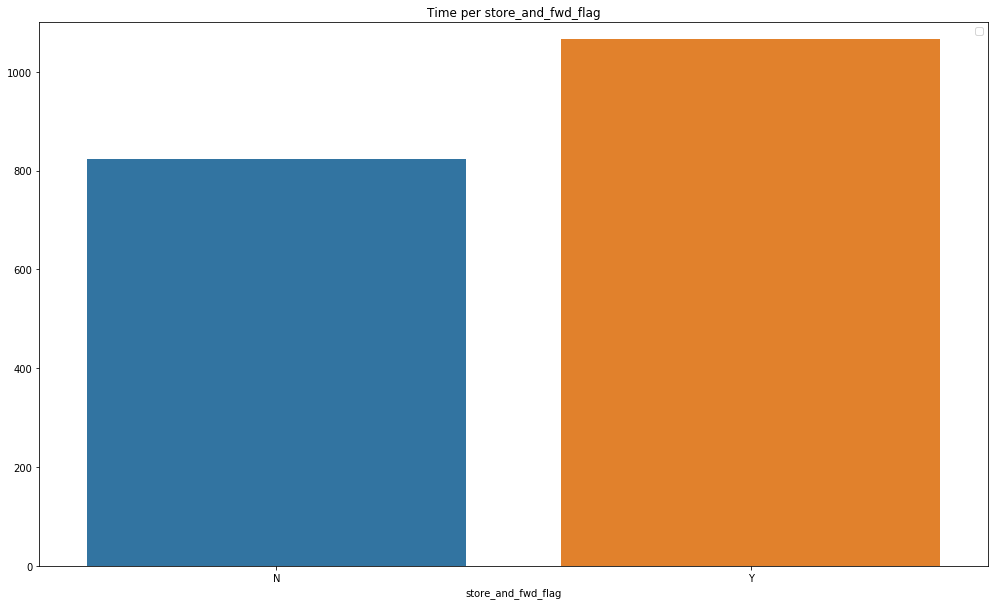

In [60]:
snwflag = train.groupby('store_and_fwd_flag')['trip_duration'].mean()

plt.subplots(1,1,figsize = (17,10))
plt.ylim(ymin = 0)
plt.ylim(ymax = 1100)
plt.title('Time per store_and_fwd_flag')
plt.legend(loc = 0)
sns.barplot(snwflag.index, snwflag.values)

No handles with labels found to put in legend.


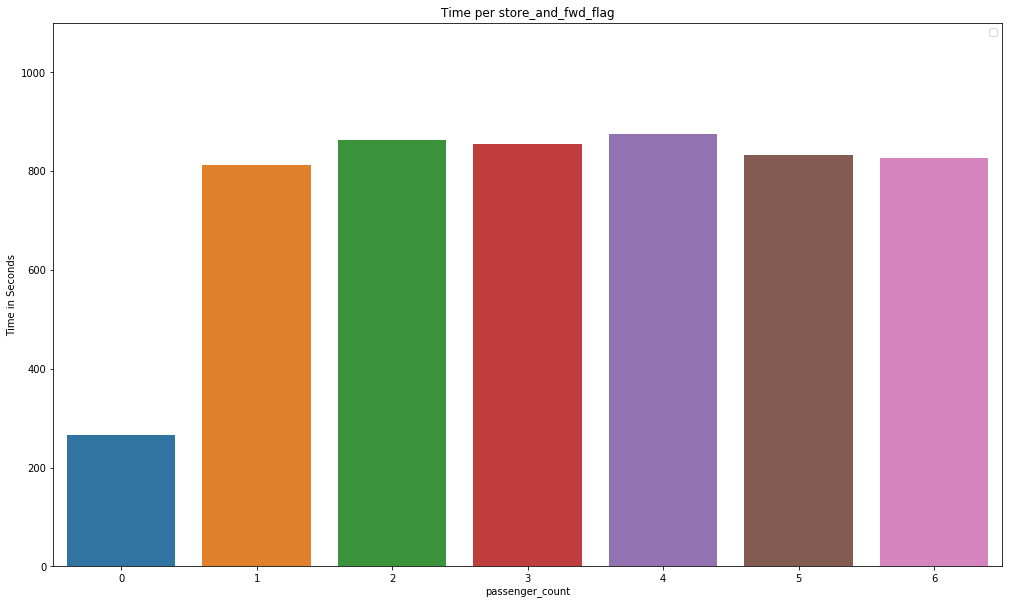

In [61]:
pc = train.groupby('passenger_count')['trip_duration'].mean()

plt.subplots(1, 1, figsize = (17,10))
plt.ylim(ymin = 0)
plt.ylim(ymax = 1100)
plt.title('Time per store_and_fwd_flag')
plt.legend(loc = 0)
plt.ylabel('Time in Seconds')
sns.barplot(pc.index, pc.values)

In [62]:
train.groupby('passenger_count').size()

passenger_count
0         52
1    1018715
2     206864
3      58989
4      27957
5      76912
6      47639
dtype: int64

In [63]:
test.groupby('passenger_count').size()

passenger_count
0        23
1    443447
2     90027
3     25686
4     12017
5     33411
6     20521
9         2
dtype: int64

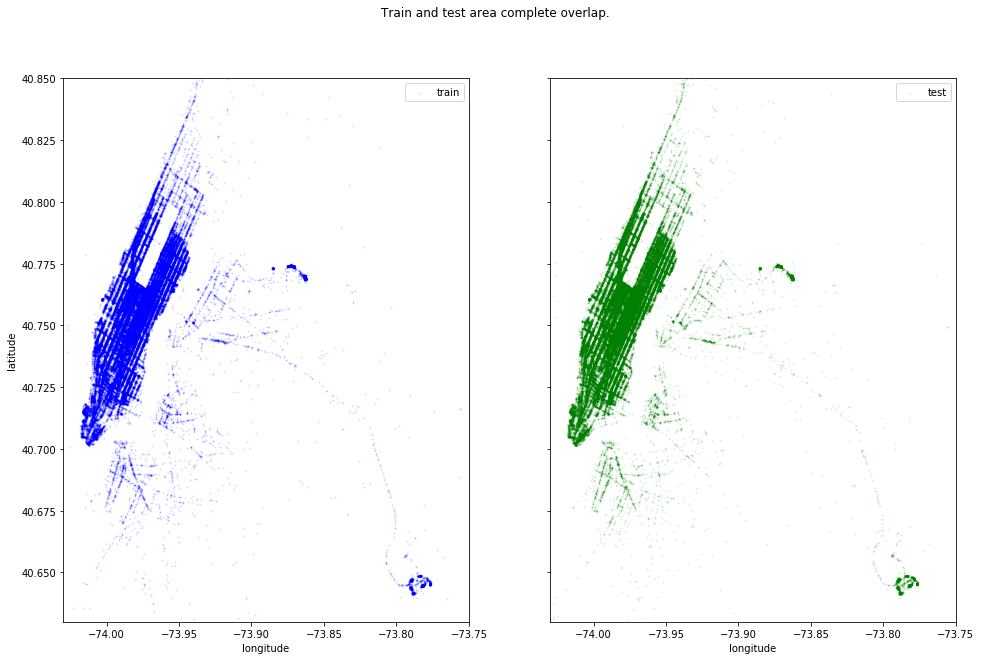

In [64]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols = 2, sharex = True, sharey = True)

ax[0].scatter(train['pickup_longitude'].values[:100000], train['pickup_latitude'].values[:100000],
             color = 'blue', s = 1, label = 'train', alpha = 0.1)

ax[1].scatter(test['pickup_longitude'].values[:100000], test['pickup_latitude'].values[:100000],
             color = 'green', s = 1, label = 'test', alpha = 0.1)

fig.suptitle('Train and test area complete overlap.')

ax[0].legend(loc = 0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc = 0)

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [65]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [66]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [67]:
train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, 
                                                     train['pickup_longitude'].values, 
                                                     train['dropoff_latitude'].values, 
                                                     train['dropoff_longitude'].values)

test.loc[:, 'distance_haversine'] = haversine_array(test['pickup_latitude'].values, 
                                                    test['pickup_longitude'].values, 
                                                    test['dropoff_latitude'].values, 
                                                    test['dropoff_longitude'].values)    
    
train.loc[:, 'distance_dummy_manhattan'] =  dummy_manhattan_distance(train['pickup_latitude'].values, 
                                                                     train['pickup_longitude'].values, 
                                                                     train['dropoff_latitude'].values, 
                                                                     train['dropoff_longitude'].values)

test.loc[:, 'distance_dummy_manhattan'] =  dummy_manhattan_distance(test['pickup_latitude'].values, 
                                                                    test['pickup_longitude'].values, 
                                                                    test['dropoff_latitude'].values, 
                                                                    test['dropoff_longitude'].values)

train.loc[:, 'direction'] = bearing_array(train['pickup_latitude'].values, 
                                          train['pickup_longitude'].values, 
                                          train['dropoff_latitude'].values, 
                                          train['dropoff_longitude'].values)

test.loc[:, 'direction'] = bearing_array(test['pickup_latitude'].values, 
                                         test['pickup_longitude'].values, 
                                         test['dropoff_latitude'].values, 
                                         test['dropoff_longitude'].values)

In [68]:
coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                   train[['dropoff_latitude', 'dropoff_longitude']].values))
coords

array([[ 40.76793671, -73.98215485],
       [ 40.73856354, -73.98041534],
       [ 40.7639389 , -73.97902679],
       ...,
       [ 40.70737076, -74.00443268],
       [ 40.75710678, -73.97463226],
       [ 40.79058456, -73.97280884]])

In [69]:
sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters = 100, batch_size = 10000).fit(coords[sample_ind])
kmeans

MiniBatchKMeans(batch_size=10000, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=100, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [70]:
train.loc[:, 'pickup_cluster'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
train.loc[:, 'dropoff_cluster'] = kmeans.predict(train[['dropoff_latitude', 'dropoff_longitude']])
test.loc[:, 'pickup_cluster'] = kmeans.predict(test[['pickup_latitude', 'pickup_longitude']])
test.loc[:, 'dropoff_cluster'] = kmeans.predict(test[['pickup_latitude', 'pickup_longitude']])

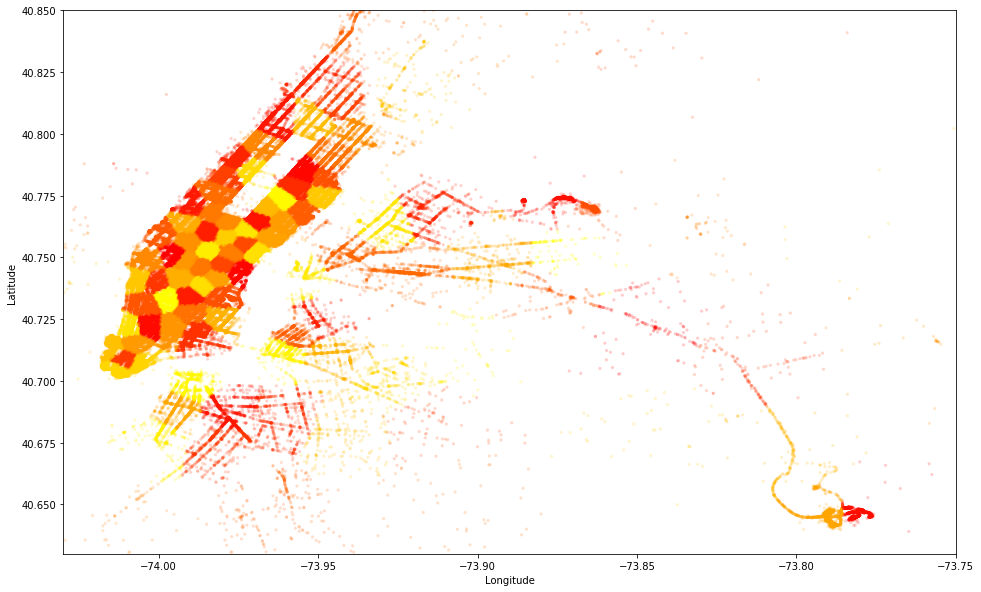

In [71]:
fig, ax = plt.subplots(ncols = 1, nrows = 1)
ax.scatter(train.pickup_longitude.values[:500000],
          train.pickup_latitude.values[:500000],
          s = 10, lw = 0, c = train.pickup_cluster[:500000].values,
          cmap = 'autumn', alpha = 0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [72]:
train['Month'] = train['pickup_datetime'].dt.month
test['Month'] = test['pickup_datetime'].dt.month

In [73]:
train.groupby('Month').size(), test.groupby('Month').size()

(Month
 1    226444
 2    235054
 3    252443
 4    247855
 5    244591
 6    230741
 dtype: int64,
 Month
 1     97676
 2    102314
 3    109697
 4    107432
 5    107570
 6    100445
 dtype: int64)

In [74]:
train['DayofMonth'] = train['pickup_datetime'].dt.day
test['DayofMonth'] = test['pickup_datetime'].dt.day
len(train.groupby('DayofMonth').size()), len(test.groupby('DayofMonth').size())

(31, 31)

In [75]:
train['Hour'] = train['pickup_datetime'].dt.hour
test['Hour'] = test['pickup_datetime'].dt.hour
len(train.groupby('Hour').size()),len(test.groupby('Hour').size())

(24, 24)

In [76]:
train['dayofweek'] = train['pickup_datetime'].dt.dayofweek
test['dayofweek'] = test['pickup_datetime'].dt.dayofweek
len(train.groupby('dayofweek').size()),len(test.groupby('dayofweek').size())

(7, 7)

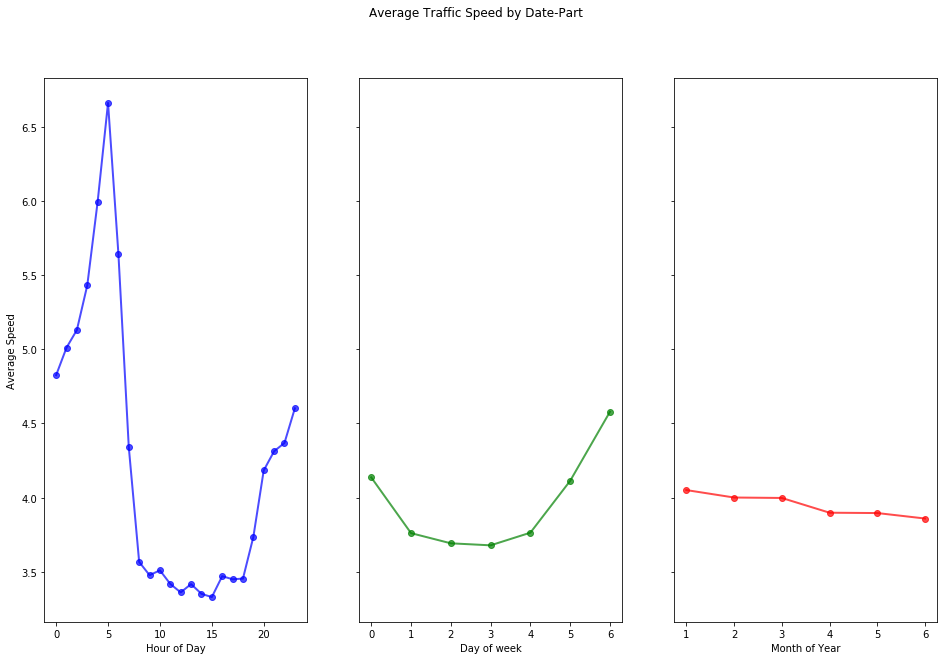

In [77]:
train.loc[:, 'avg_speed_h'] = 1000 * train['distance_haversine'] / train['trip_duration']
train.loc[:, 'avg_speed_m'] = 1000 * train['distance_dummy_manhattan'] / train['trip_duration']
fig, ax = plt.subplots(ncols = 3, sharey = True)

ax[0].plot(train.groupby('Hour').mean()['avg_speed_h'], 'bo-', lw = 2, alpha = 0.7)
ax[1].plot(train.groupby('dayofweek').mean()['avg_speed_h'], 'go-', lw = 2, alpha = 0.7)
ax[2].plot(train.groupby('Month').mean()['avg_speed_h'], 'ro-', lw = 2, alpha = 0.7)

ax[0].set_xlabel('Hour of Day')
ax[1].set_xlabel('Day of week')
ax[2].set_xlabel('Month of Year')
ax[0].set_ylabel('Average Speed')

fig.suptitle('Average Traffic Speed by Date-Part')
plt.show()

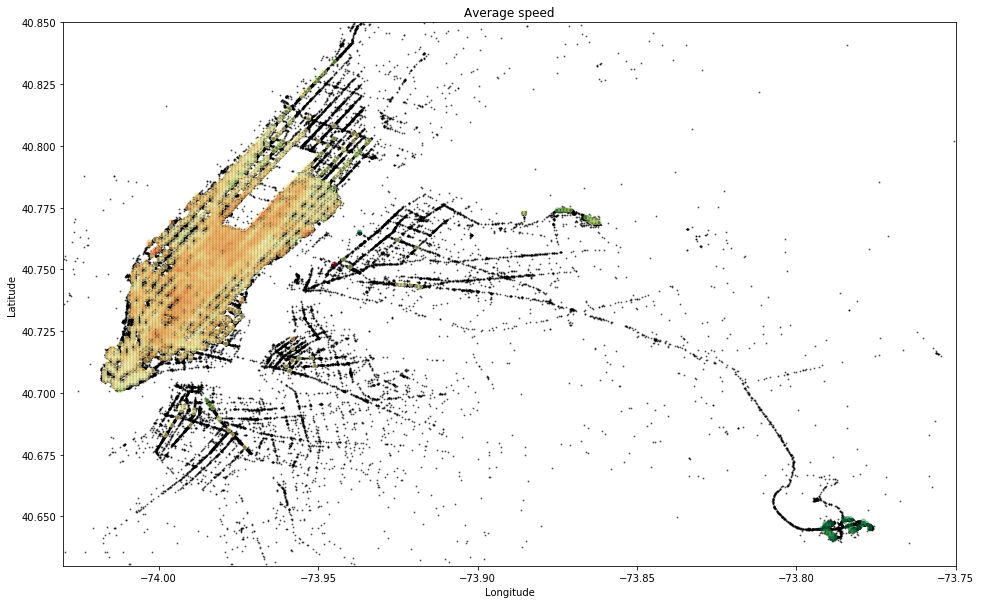

In [78]:
train.loc[:, 'pickup_lat_bin'] = np.round(train['pickup_latitude'], 3)
train.loc[:, 'pickup_long_bin'] = np.round(train['pickup_longitude'], 3)

gby_cols = ['pickup_lat_bin', 'pickup_long_bin']

coord_speed = train.groupby(gby_cols).mean()[['avg_speed_h']].reset_index()
coord_count = train.groupby(gby_cols).count()[['id']].reset_index()
coord_stats = pd.merge(coord_speed, coord_count, on = gby_cols)
coord_stats = coord_stats[coord_stats['id'] > 100]

fig, ax = plt.subplots(ncols = 1, nrows = 1)
ax.scatter(train.pickup_longitude.values[:500000], train.pickup_latitude.values[:500000],
          color = 'black', s = 1, alpha = 0.5)

ax.scatter(coord_stats.pickup_long_bin.values, coord_stats.pickup_lat_bin.values,
          c = coord_stats.avg_speed_h.values,
          cmap = 'RdYlGn', s = 20, alpha = 0.5, vmin = 1, vmax = 8)

ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Average speed')
plt.show()

In [79]:
%pwd

'/Users/imjong-in/Nano degree python/Kaggle_Struggle'

In [80]:
fr1 = pd.read_csv('/Users/imjong-in/Nano degree python/Kaggle_Struggle_data/NYC_taxi/fastest_routes_train_part_1.csv',
                 usecols = ['id','total_distance','total_travel_time','number_of_steps'])

fr2 = pd.read_csv('/Users/imjong-in/Nano degree python/Kaggle_Struggle_data/NYC_taxi/fastest_routes_train_part_2.csv',
                 usecols = ['id','total_distance','total_travel_time','number_of_steps'])

test_street_info = pd.read_csv('/Users/imjong-in/Nano degree python/Kaggle_Struggle_data/NYC_taxi/fastest_routes_test.csv',
                                usecols = ['id','total_distance','total_travel_time','number_of_steps'])

train_street_info = pd.concat((fr1, fr2))
train = train.merge(train_street_info, how = 'left', on = 'id')
test = test.merge(test_street_info, how = 'left', on = 'id')

In [81]:
train.shape, test.shape

((1437128, 29), (625134, 22))

In [96]:
vendor_train = pd.get_dummies(train['vendor_id'], prefix = 'v1', prefix_sep = '_')
vendor_test = pd.get_dummies(test['vendor_id'], prefix = 'v1', prefix_sep = '_')

passenger_count_train = pd.get_dummies(train['passenger_count'], prefix = 'pc', prefix_sep = '_')
passenger_count_test = pd.get_dummies(test['passenger_count'], prefix = 'pc', prefix_sep = '_')

store_and_fwd_flag_train = pd.get_dummies(train['store_and_fwd_flag'], prefix = 'sf', prefix_sep = '_')
store_and_fwd_flag_test = pd.get_dummies(test['store_and_fwd_flag'], prefix = 'sf', prefix_sep = '_')

cluster_pickup_train = pd.get_dummies(train['pickup_cluster'], prefix = 'p', prefix_sep = '_')
cluster_pickup_test = pd.get_dummies(test['pickup_cluster'], prefix = 'p', prefix_sep = '_')

cluster_dropoff_train = pd.get_dummies(train['dropoff_cluster'], prefix = 'd', prefix_sep = '_')
cluster_dropoff_test = pd.get_dummies(test['dropoff_cluster'], prefix = 'd', prefix_sep = '_')

month_train = pd.get_dummies(train['Month'], prefix = 'm', prefix_sep = '_')
month_test = pd.get_dummies(test['Month'], prefix = 'm', prefix_sep = '_')

dom_train = pd.get_dummies(train['DayofMonth'], prefix = 'dom', prefix_sep = '_')
dom_test = pd.get_dummies(test['DayofMonth'], prefix = 'dom', prefix_sep = '_')

hour_train = pd.get_dummies(train['Hour'], prefix = 'h', prefix_sep = '_')
hour_test = pd.get_dummies(test['Hour'], prefix = 'h', prefix_sep = '_')

dow_train = pd.get_dummies(train['dayofweek'], prefix = 'dow', prefix_sep = '_')
dow_test = pd.get_dummies(test['dayofweek'], prefix = 'dow', prefix_sep = '_')

In [87]:
vendor_train.shape, vendor_test.shape

((1437128, 2), (625134, 2))

In [88]:
psassenger_count_train.shape, passenger_count_test.shape

((1437128, 7), (625134, 8))

In [89]:
store_and_fwd_flag_train.shape, store_and_fwd_flag_test.shape

((1437128, 2), (625134, 2))

In [90]:
cluster_pickup_train.shape,cluster_pickup_test.shape

((1437128, 100), (625134, 100))

In [91]:
cluster_dropoff_train.shape,cluster_dropoff_test.shape

((1437128, 100), (625134, 100))

In [92]:
month_train.shape,month_test.shape

((1437128, 6), (625134, 6))

In [93]:
dom_train.shape,dom_test.shape

((1437128, 31), (625134, 31))

In [94]:
hour_train.shape,hour_test.shape

((1437128, 24), (625134, 24))

In [97]:
dow_train.shape,dow_test.shape

((1437128, 7), (625134, 7))

In [98]:
passenger_count_test = passenger_count_test.drop('pc_9', axis = 1)

In [99]:
train = train.drop(['id','vendor_id','passenger_count','store_and_fwd_flag','Month','DayofMonth','Hour',
                    'dayofweek','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],
                   axis = 1)

Test_id = test['id']

test = test.drop(['id','vendor_id','passenger_count','store_and_fwd_flag','Month','DayofMonth','Hour','dayofweek',
                   'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis = 1)

train = train.drop(['dropoff_datetime','avg_speed_h','avg_speed_m','pickup_lat_bin','pickup_long_bin',
                    'trip_duration'], axis = 1)

In [100]:
train.shape, test.shape

((1437128, 11), (625134, 10))

In [101]:
Train_Master = pd.concat([train,
                         vendor_train,
                         passenger_count_train,
                         store_and_fwd_flag_train,
                         cluster_pickup_train,
                         cluster_dropoff_train,
                         month_train,
                         dom_train,
                         hour_test,
                         dow_train], axis = 1)

In [105]:
Test_master = pd.concat([test,
                          vendor_test,
                          passenger_count_test,
                          store_and_fwd_flag_test,
                          cluster_pickup_test,
                          cluster_dropoff_test,
                         month_test,
                         dom_test,
                          hour_test,
                          dow_test
                         ], axis=1)

In [106]:
Train_Master.shape,Test_master.shape

((1437128, 290), (625134, 289))

In [107]:
Train_Master = Train_Master.drop(['pickup_datetime', 'pickup_date'], axis = 1)
Test_master = Test_master.drop(['pickup_datetime', 'pickup_date'], axis = 1)

In [108]:
Train_Master.shape,Test_master.shape

((1437128, 288), (625134, 287))

In [109]:
Train, Test = train_test_split(Train_Master[0:100000], test_size = 0.2)

In [111]:
X_train = Train.drop(['log_trip_duration'], axis = 1)
Y_train = Train['log_trip_duration']
X_test = Test.drop(['log_trip_duration'], axis = 1)
Y_test = Test['log_trip_duration']

Y_test = Y_test.reset_index().drop('index', axis = 1)
Y_train = Y_train.reset_index().drop('index', axis = 1)

In [112]:
dtrain = xgb.DMatrix(X_train, label = Y_train)
dvalid = xgb.DMatrix(X_test, label = Y_test)
dtest = xgb.DMatrix(Test_master)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [113]:
xgb_pars = {'min_child_weight' : 1, 'eta' : 0.5, 'colsample_bytree' : 0.9,
           'max_depth' : 6, 'subsample' : 0.9, 'lambda' : 1, 'nthread' : -1,
            'booster' : 'gbtree', 'silent' : 1, 'eval_metric' : 'rmse', 'objective' : 'reg:linear'}

model = xgb.train(xgb_pars, dtrain, 10, watchlist, early_stopping_rounds = 2,
                 maximize = False, verbose_eval = 1)

print('Modeling RMSLE %.5F' %model.best_score)

[0]	train-rmse:3.02301	valid-rmse:3.02699
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 2 rounds.
[1]	train-rmse:1.557	valid-rmse:1.56308
[2]	train-rmse:0.86059	valid-rmse:0.871033
[3]	train-rmse:0.561112	valid-rmse:0.577181
[4]	train-rmse:0.453318	valid-rmse:0.473053
[5]	train-rmse:0.420027	valid-rmse:0.441537
[6]	train-rmse:0.409213	valid-rmse:0.433058
[7]	train-rmse:0.404659	valid-rmse:0.429503
[8]	train-rmse:0.402227	valid-rmse:0.427742
[9]	train-rmse:0.399832	valid-rmse:0.426758
Modeling RMSLE 0.42676


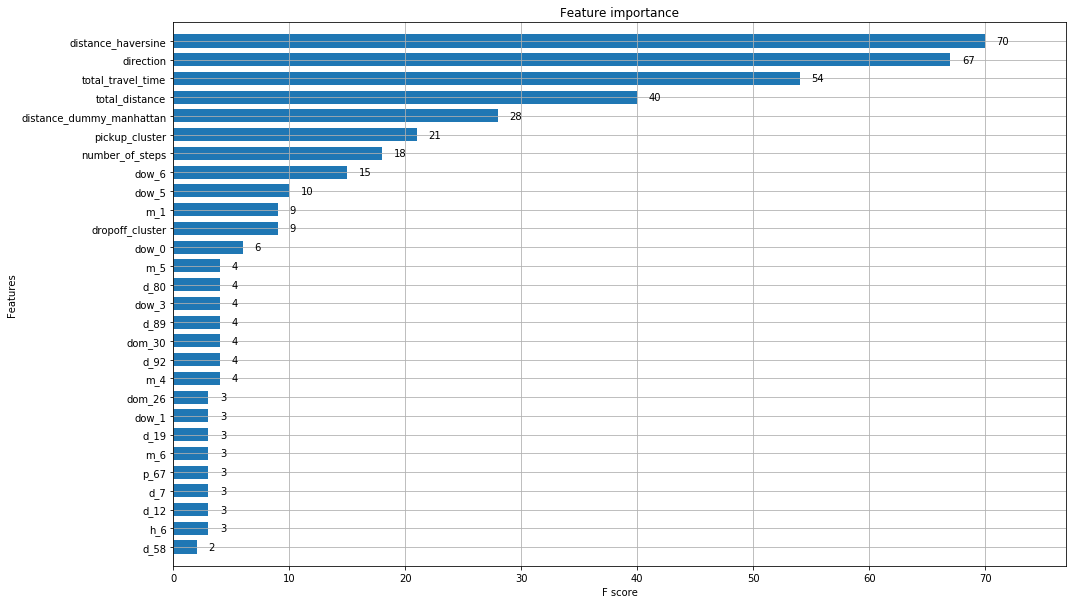

In [116]:
xgb.plot_importance(model, max_num_features = 28, height= 0.7)

In [117]:
pred = model.predict(dtest)
pred = np.exp(pred) - 1

In [119]:
pred

array([ 971.9275 ,  685.3514 ,  452.42734, ..., 1431.792  , 2194.4136 ,
       1208.5923 ], dtype=float32)

In [120]:
submission = pd.concat([Test_id, pd.DataFrame(pred)], axis = 1)
submission.columns = ['id', 'trip_duration']
submission['trip_duration'] = submission.apply(lambda x : 1 if (x['trip_duration'] <= 0) else x['trip_duration'],
                                               axis = 1)
submission.to_csv('submission.csv', index = False)